<a href="https://colab.research.google.com/github/Azwadd/CS_448-Artificial-Intelligence/blob/main/Assignment%203/AS03_Azwad_Shameem.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [271]:
# Part 1: Load the dataset
# Load the dataset (load remotely, not locally)
iris = load_iris(as_frame=True) # This one is used only to display summary
results = [] # this list will be used to store the results to be shown in a table

In [272]:
# Output the first 15 rows of the data
iris['data'].head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [273]:
# Output the first 15 rows of the data
pd.DataFrame(iris['target']).head(15)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [274]:
# Display a summary of the table information (number of datapoints, etc.)
print("Feature names", iris['feature_names'])
print("Shape of Feature names", pd.DataFrame(iris['feature_names']).shape)
print("Shape of Features", iris['data'].shape)
print("Label names", iris['target_names'])
print("Shape of Label names", pd.DataFrame(iris['target_names']).shape)
print("Shape of Labels", iris['target'].shape)

Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of Feature names (4, 1)
Shape of Features (150, 4)
Label names ['setosa' 'versicolor' 'virginica']
Shape of Label names (3, 1)
Shape of Labels (150,)


Explain what the data is in your own words. What are your features and labels?
What is the mapping of your labels to the actual classes?

In [275]:
# Part 2: Split the dataset into train and test
# Take the dataset and split it into our features (X) and label (y)
features, labels = load_iris(return_X_y=True) # this loads as features and labels for us
# Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)
x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size=.9, test_size=.1)

In [276]:
# Part 3: Logistic Regression
# i. Use sklearn to train a LogisticRegression model on the training set
lr = LogisticRegression().fit(x_train, y_train)
# ii. For a sample datapoint, predict the probabilities for each possible class
print("Prediction for class 0:", lr.predict_proba([[5.1, 3.5, 1.4, 0.2]]), "--> Highest probability should be the first one")
print("Prediction for class 1:", lr.predict_proba([[7.0, 3.2, 4.7, 1.4]]), "--> Highest probability should be the second one")
print("Prediction for class 2:", lr.predict_proba([[6.3, 3.3, 6.0, 2.5]]), "--> Highest probability should be the third one")
# iii. Report on the score for Logistic regression model, what does the score measure?
results.append(lr.score(x_train, y_train))
print("Train Accuracy:", results[len(results)-1])
results.append(lr.score(x_test, y_test))
print("Test Accuracy:", results[len(results)-1])

Prediction for class 0: [[9.79527812e-01 2.04721654e-02 2.29567722e-08]] --> Highest probability should be the first one
Prediction for class 1: [[0.00278053 0.86466762 0.13255186]] --> Highest probability should be the second one
Prediction for class 2: [[1.58185286e-06 5.12841903e-03 9.94869999e-01]] --> Highest probability should be the third one
Train Accuracy: 0.9703703703703703
Test Accuracy: 1.0


The train accuracy is about 97% and the test accuracy is 100%, this seems like the model has underfit in this simulation.

In [277]:
# iv. Extract the coefficents and intercepts for the boundary line(s)
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: [  9.54117522   2.49328079 -12.03445601]
Coefficients: [[-0.39999741  0.93481451 -2.44269122 -1.03806968]
 [ 0.46124372 -0.32078229 -0.18813799 -0.9091972 ]
 [-0.06124631 -0.61403221  2.63082921  1.94726688]]


In [278]:
# Part 4: Support Vector Machine
# i. Use sklearn to train a Support Vector Classifier on the training set
svm1 = svm.SVC(probability=True).fit(x_train, y_train)
# ii. For a sample datapoint, predict the probabilities for each possible class
print("Prediction for class 0:", svm1.predict_proba([[5.1, 3.5, 1.4, 0.2]]), "--> Highest probability should be the first one")
print("Prediction for class 1:", svm1.predict_proba([[7.0, 3.2, 4.7, 1.4]]), "--> Highest probability should be the second one")
print("Prediction for class 2:", svm1.predict_proba([[6.3, 3.3, 6.0, 2.5]]), "--> Highest probability should be the third one")
# iii. Report on the score for the SVM, what does the score measure?
results.append(svm1.score(x_train, y_train))
print("Train Accuracy:", results[len(results)-1])
results.append(svm1.score(x_test, y_test))
print("Test Accuracy:", results[len(results)-1])

Prediction for class 0: [[0.9747327  0.01579445 0.00947285]] --> Highest probability should be the first one
Prediction for class 1: [[0.01233575 0.86211959 0.12554466]] --> Highest probability should be the second one
Prediction for class 2: [[0.00708249 0.00105843 0.99185908]] --> Highest probability should be the third one
Train Accuracy: 0.9481481481481482
Test Accuracy: 1.0


The particular scores of the predict_proba mean how accurately can the model
predict if a datapoint for class 0, 1, 2 is given. Take for example
the prediction for class 0, the first one is 97.47% while the rest 1.15% and 0.94%.
Clearly, the model is able to predict that the particular datapoint is
class 0 with a 97.47% probaility of it being correct.

Also the scores of the svm is 94.81% for train accuracy and 100% for test
accuarcy. This shows sign of underfitting because there is a sizeable difference
between how high the test accuracy is compared to the train accuracy.

In [279]:
# Part 5: Neural Network
# i. Use sklearn to train a Neural Network (MLP Classifier) on the training set
mpc = MLPClassifier(max_iter=600).fit(x_train, y_train) # used max-iter to remove non convergence warning
# ii. For a sample datapoint, predict the probabilities for each possible class
print("Prediction for class 0:", mpc.predict_proba([[5.1, 3.5, 1.4, 0.2]]), "--> Highest probability should be the first one")
print("Prediction for class 1:", mpc.predict_proba([[7.0, 3.2, 4.7, 1.4]]), "--> Highest probability should be the second one")
print("Prediction for class 2:", mpc.predict_proba([[6.3, 3.3, 6.0, 2.5]]), "--> Highest probability should be the third one\n")
# iii. Report on the score for the Neural Network, what does the score measure?
print("default:") # note the default is actually 'relu'
results.append(mpc.score(x_train, y_train))
print("Train Accuracy:", results[len(results)-1])
results.append(mpc.score(x_test, y_test))
print("Test Accuracy:", results[len(results)-1], "\n")

# iv: Experiment with different options for the neural network, report on your best configuration (the highest score I was able to achieve was 0.8666)
for i in ["identity", "tanh", "logistic"]:
    print(i + ":")
    mpc = MLPClassifier(activation=i, max_iter=900).fit(x_train, y_train) # used max-iter to remove non convergence warning
    results.append(mpc.score(x_train, y_train))
    print("Train Accuracy:", results[len(results)-1])
    results.append(mpc.score(x_test, y_test))
    print("Test Accuracy:", results[len(results)-1], "\n")

Prediction for class 0: [[9.99714400e-01 2.85599795e-04 2.34326735e-10]] --> Highest probability should be the first one
Prediction for class 1: [[2.85822396e-04 9.97143432e-01 2.57074518e-03]] --> Highest probability should be the second one
Prediction for class 2: [[5.15193213e-08 1.63191435e-04 9.99836757e-01]] --> Highest probability should be the third one

default:
Train Accuracy: 0.9703703703703703
Test Accuracy: 1.0 

identity:
Train Accuracy: 0.9777777777777777
Test Accuracy: 1.0 

tanh:
Train Accuracy: 0.9777777777777777
Test Accuracy: 1.0 

logistic:
Train Accuracy: 0.9851851851851852
Test Accuracy: 1.0 



The best score was with the logistic activation function with the max_iter=900.
Utilizing the configuration of different max_iters, we realized that depending
on the iteration the accuracy may increase or even decreaase. The highest
accuracy I achieved was when I used max_iter=900 and I believe this is
cloest iteration to convergence that I was able to test and as a result
gave a higher score. Furthermore not utilizing max_iter gave an warning
statement that the Neural Network did not converge which is why
there is a max_iter listed for every activation function of MLPClassifier.

In [280]:
# Part 6 : K-Nearest Neighbors
# i. Use sklearn to 'train' a k-Neighbors Classifier
neighbors = KNeighborsClassifier().fit(x_train, y_train)
# ii. For a sample datapoint, predict the probabilities for each possible class
print("Prediction for class 0:", neighbors.predict_proba([[5.1, 3.5, 1.4, 0.2]]), "--> Highest probability should be the first one")
print("Prediction for class 1:", neighbors.predict_proba([[7.0, 3.2, 4.7, 1.4]]), "--> Highest probability should be the second one")
print("Prediction for class 2:", neighbors.predict_proba([[6.3, 3.3, 6.0, 2.5]]), "--> Highest probability should be the third one\n")
# iii. Report on the score for kNN, what does the score measure?
results.append(neighbors.score(x_train, y_train))
print("Train Accuracy:", results[len(results)-1])
results.append(neighbors.score(x_test, y_test))
print("Test Accuracy:", results[len(results)-1])

Prediction for class 0: [[1. 0. 0.]] --> Highest probability should be the first one
Prediction for class 1: [[0. 1. 0.]] --> Highest probability should be the second one
Prediction for class 2: [[0. 0. 1.]] --> Highest probability should be the third one

Train Accuracy: 0.9703703703703703
Test Accuracy: 1.0


The K-Nearest Neighbors algorithm was suprisingly able to give us a prediction
of a datapoint with 100% accuracy with datapoints for every class. This shows
that the K-Nearest Neighbors is very accurate at predicting datapoints correlating
to specific classes. 

The scores fo K-Nearest Neighbors are 97.03% train accuracy and 100% test accuracy. 
There is slight underfitting because the train accuracy is less than the test accuracy
but not too much since 3% difference is minimal. 

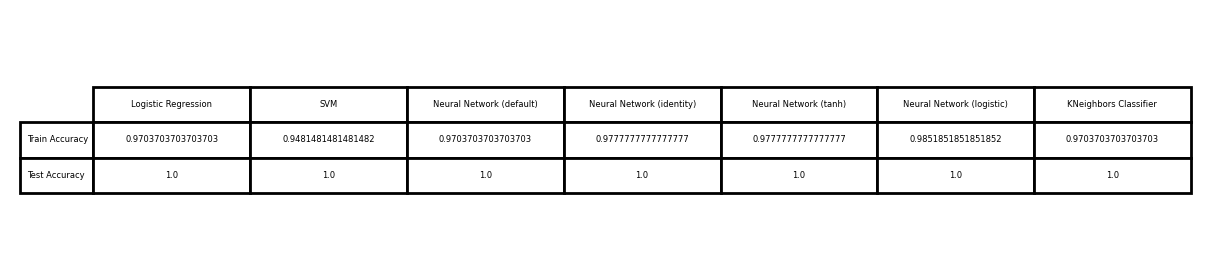

In [290]:
# Putting The Data Into A Table
fig, ax = plt.subplots(dpi=200, figsize = (7,1.5))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
cases=np.array(["Train Accuracy", "Test Accuracy"])
df = pd.DataFrame({"Logistic Regression" : results[0:2:],
                   "SVM" : results[2:4:],
                   "Neural Network (default)" : results[4:6:],
                   "Neural Network (identity)" : results[6:8:],
                   "Neural Network (tanh)" : results[8:10:],
                   "Neural Network (logistic)" : results[10:12:],
                   "KNeighbors Classifier" : results[12:14:],
                   })
ax.table(cellText=df.values, rowLabels=cases, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

Note: The table above shows the data for each model for your convenience

Part 7: Conclusions and takeaways.
Considering test and train accuracies the model with the highest accuracy is the Neural Network using the
logistic activation function with a train accuracy of 98.5% and a 100% test accuracy. For the runnersup there is a two way tie
with the identity and 'tanh' neural networks coming in with a train accuracy of 97.77% and a 100% test accuracy.
For 3rd place we have a 3 way tie betweeen Logistic Regression, Neural Network(default) and
the KNeighbors Classifier coming in a train accuracy of 97.03% and a test accuracy of 100%.
In last place we have the Support Vector Machine with a train accuracy of 94.81% and
a test accuracy of 100%.

I believe the Neural Network using activation='logistic' performed the best because
this particular dataset slightly is more aligned to this specific model. The difference
between the accuracies of each model is very close so it is difficult to say exactly why
one model will always perform better than the other for a particular split of the dataset.
If this same simulation were to be ran again with the same dataset and procedure,
any model has a chance of performing the best because the way the dataset is randomly split
can inadvertedly benefit one model over the other. If the accuracies were more drastically
different than we can come with conclusions saying one model is better than the other
but since the accuracies are so close we are unable to. As a result, the only thing we can
say for certainty is that in this particular simulation the algorithm from the Neural Network
using logistic activation benefited the most.

Suprisingly all the models had a 100% test accuracy, interestingly the data was split in a away that all the models
had full test accuracy. However, no model recieved 100% test accuracy. This leads us to believe there was some
underfitting. Clearly, the Support Vector Machine had the highest underfitting occuring
because there is a 6% gap between train and test accuracies. The other models
have a range of 2-3% differences in accuracies which shows there is some slight
underfitting in this particular simulation.